In [1]:
import cv2
#import os
import time
import numpy as np
import matplotlib.pyplot as plt
#from os.path import dirname, join
%matplotlib inline

In [2]:
MODE = "MPI"

if MODE is "COCO":
    #current_folder = globals()['_dh'][0]
    #protoFile = os.path.join(current_folder,"C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\coco\\pose_deploy_linevec.txt" )
    protoFile ="C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\coco\\pose_deploy_linevec.txt"
    #weightsFile =os.path.join(current_folder,"C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\coco\\pose_iter_440000.caffemodel")
    weightsFile ="C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\coco\\pose_iter_440000.caffemodel"
    
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE is "MPI" :
    #current_folder = globals()['_dh'][0]
    #protoFile = os.path.join(current_folder,"C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\mpi\\pose_deploy_linevec_faster_4_stages.txt")
    #weightsFile = os.path.join(current_folder,"C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\mpi\\pose_iter_160000.caffemodel")
    protoFile ="C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\mpi\\pose_deploy_linevec_faster_4_stages.txt"
    weightsFile = "C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\mpi\\pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

In [3]:
image1 = cv2.imread("C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\multiple.jpeg")
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

In [4]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 44, 46, 46)


(-0.5, 1279.5, 1071.5, -0.5)

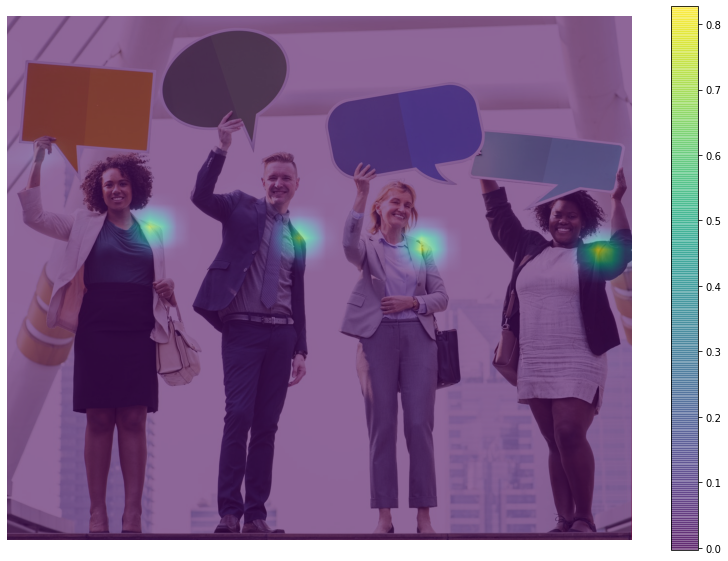

In [5]:
i = 5
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

(-0.5, 1279.5, 1071.5, -0.5)

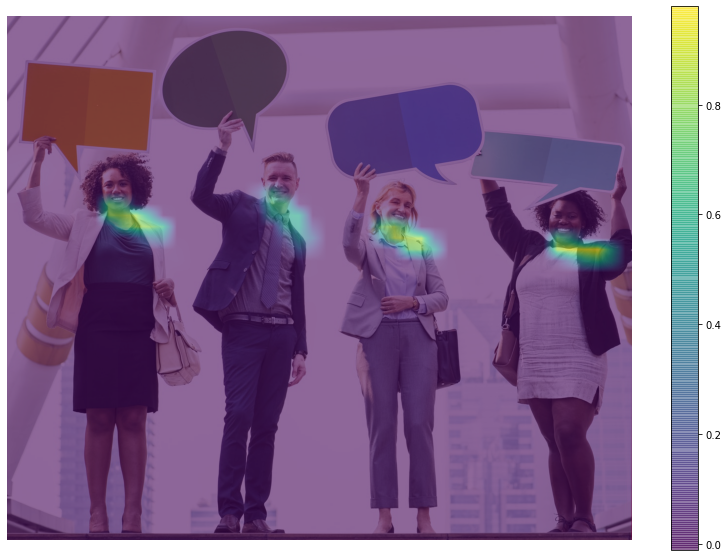

In [6]:
i = 24
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

In [7]:
frame = cv2.imread("C:\\Users\\ghais\\OneDrive\\Desktop\\pose\\single.jpeg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [8]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

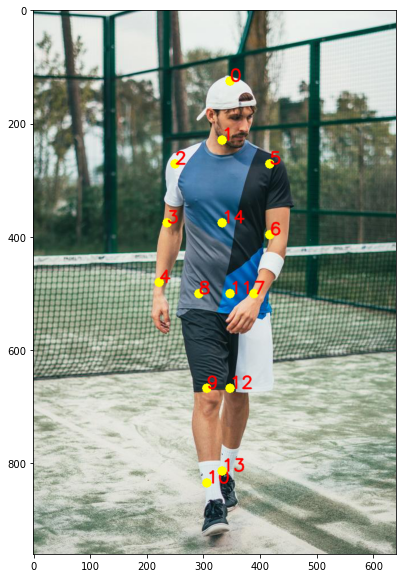

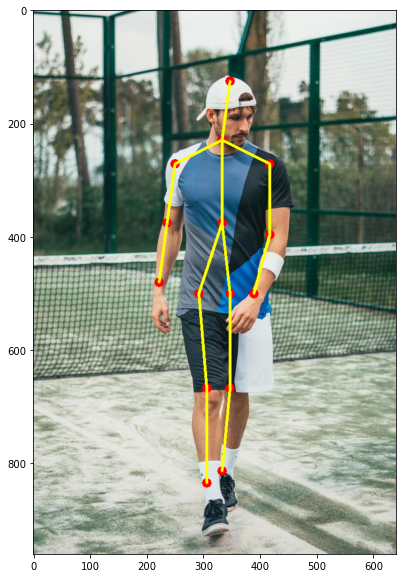

In [9]:
points = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frameCopy, (int(x), int(y)), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)
        cv2.circle(frame, (int(x), int(y)), 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 3)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))